In [8]:
import os
path = os.getcwd()
file = path+"\\titanic_train.csv"

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv(file, sep = ',', index_col="PassengerId") #tindex column 명 지정
data.head()
# 인덱스가 내가 만든 인덱스인지, 자동으로 지정된 인덱스인지 유의할 것.
# 자동 인덱스는 자동으로 0~ 시작하는데 만약 내가 1~ 시작했다면, 약간의 차이로 다른 데이터가 뽑힘


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# 간단한 df의 정보 확인
data.info()
# => ML: 컬럼의 타입이 수치형이 아닌 것 체크
#      : 빠진 데이터 존재 => 채울지(대체값 선택), 지울지

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [15]:
# Age 컬럼에서 누락된 데이터만 체크해보자
col = "Age"
# sql : select * from df where Age is null : / is not null
len(data[data["Age"].isnull()])/len(data)

0.19865319865319866

In [17]:
# 전체 컬럼을 돌려가면서 누락된 비율 체크

for col in data.columns:
    print(col, ":",len(data[data[col].isnull()])/len(data))

Survived : 0.0
Pclass : 0.0
Name : 0.0
Sex : 0.0
Age : 0.19865319865319866
SibSp : 0.0
Parch : 0.0
Ticket : 0.0
Fare : 0.0
Cabin : 0.7710437710437711
Embarked : 0.002244668911335578


In [18]:
# 여러 조건 필터링
# 조건 Embarked = "C" and Fare 200 초과
data[(data["Embarked"]=="C")&(data["Fare"]>200)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C


In [19]:
# 실제 데이터를 확인할 때 : 정렬 사용
# -> 실제 데이터 탐색 : stata(long Blob)
# -> 정렬 : df.sort_values(값)/ sort_index(틀)
        # + by = [정렬 기준, 정렬 기준2]
data[(data["Embarked"]=="C")&(data["Fare"]>200)].sort_values(by = ["Fare"], ascending =False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


In [20]:
# 기존의 값을 워낳는 기준 값으로 변경하는 일
# -> ml 에서 특징에 feature을 어떻게 생성할 것인가! (원하는 결과를 잘 나타낼 수 있는 컬럼, 특징)
# + eda 탐색, 도메인 지식
# -> 나이 : 개별 나이를 나이대로 좀 조정하려고 함.
    # 예) 30 미만 : 1, 30~55미만 : 2, 55 이상 : 3
    # : 통념, 분야마다 쓰는 기준 적용

# --> sql : case when ~
# --> pandas m1) apply + lambda ( +if) : if~ else
            # m2) 변경룰에 대한 dict -> replace
            # m3) apply + 내가 직접 변경함수 만들기


In [21]:
# m1) 나이 조정에 대한 함수 조정
    # -> 입력 : age , 출력 : 나이대로 변경한 1~3

def age_cat(age):
    if age < 30:
        return 1
    elif age<55:
        return 2
    else : 
        return 3

data["Age"].apply(lambda x :age_cat(x))

PassengerId
1      1
2      2
3      1
4      2
5      2
      ..
887    1
888    1
889    3
890    1
891    2
Name: Age, Length: 891, dtype: int64

In [22]:
data["Age"].apply(age_cat) # 함수를 바로 적용할 수도 있음

PassengerId
1      1
2      2
3      1
4      2
5      2
      ..
887    1
888    1
889    3
890    1
891    2
Name: Age, Length: 891, dtype: int64

In [25]:
# m2) lambda + if문을 함께: 값을 변경하는..
data["Age_new"] = data["Age"].apply(lambda x: 1 if x<30 else(2 if x<55 else 3))
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [26]:
data["Age_new"].value_counts()

Age_new
1    384
2    288
3    219
Name: count, dtype: int64

In [27]:
# + 비율
data["Age_new"].value_counts(normalize=True)

Age_new
1    0.430976
2    0.323232
3    0.245791
Name: proportion, dtype: float64

In [29]:
# 성별이 몇명인지 확인

# 1) value_count()
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [30]:
# 남성 
data["Sex"].value_counts()[0]

C:\Users\NT551XCJ\AppData\Local\Temp\ipykernel_19008\2905224217.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data["Sex"].value_counts()[0]


577

In [32]:
# 2) 필터링 T/F = 1/0 ==> sum() 카운팅! sql
(data["Sex"] =="male").sum() ,(data["Sex"] =="female").sum()

(577, 314)

<Axes: xlabel='Sex'>

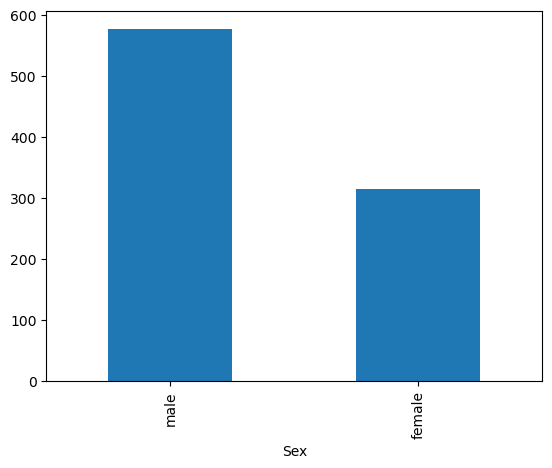

In [34]:
data["Sex"].value_counts().plot(kind="bar")

<Axes: title={'center': 'F/M Counts'}, xlabel='Sex'>

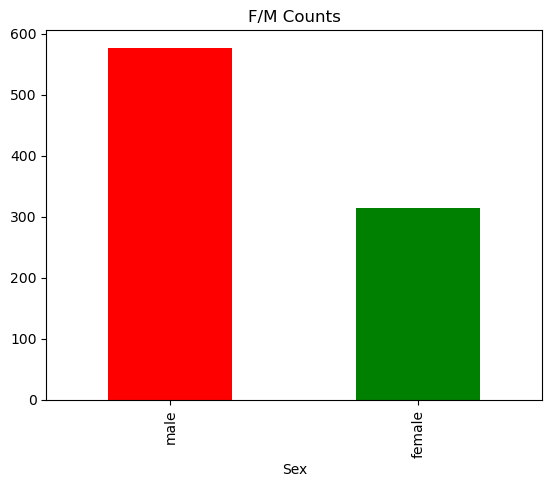

In [35]:
data["Sex"].value_counts().plot(kind="bar",
                               title = "F/M Counts",
                               color = ["r","g"])

In [37]:
# pandas 의 Series, DataFrame 에서 바로 plot()메서드로 matplotlib 의
# 기본 그래프들을 그릴 수 있음
# 판, 영역, 기타 세팅을 할 필요 없이 간단하게 종류 + 옵션들만 파라미터로 색상, 제목

# 참고) 주어진 데이터를 변형하는 과정에 : 빈도 테이블
pd.crosstab(data["Pclass"], data["Sex"])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


<Axes: xlabel='Survived', ylabel='Age'>

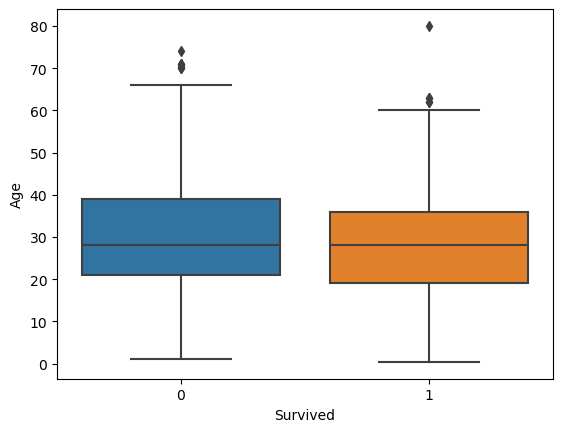

In [38]:
# Seaborn 을 통해서 그래프 그리기
# -> 어떤 df, 가로 x, 세로 y, 구별해서
#  pivot_table(index, values, columns)

sns.boxplot(x = data["Survived"], y = data["Age"])

<Axes: xlabel='Survived', ylabel='Age'>

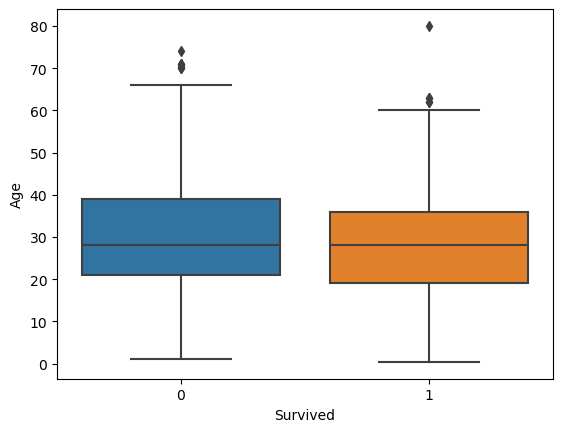

In [39]:
# 지정해서 하는 방식
sns.boxplot( data = data, x = "Survived", y = "Age")

<Axes: xlabel='Pclass', ylabel='Fare'>

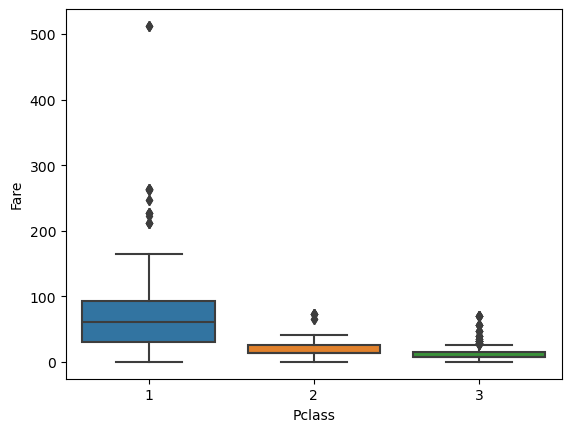

In [41]:
# 객실 등급 pclass, 요금 fare -> boxplot
sns.boxplot(data = data, x="Pclass", y = "Fare")

<Axes: xlabel='Pclass', ylabel='Fare'>

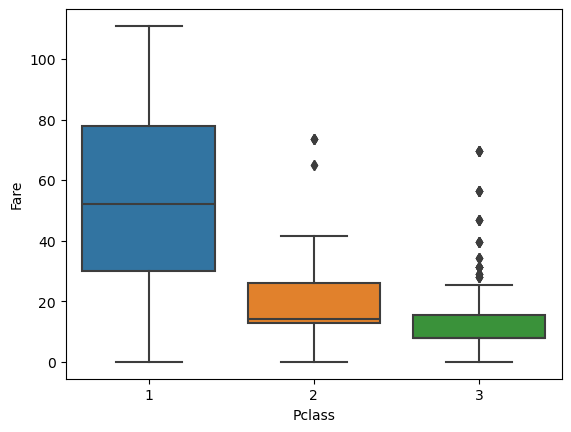

In [43]:
# 아웃라이어 제거
# 예) 상위 5프로는 제외하고 95프로 데이터만 보자
# -> quantitle(0.95)

sns.boxplot(data = data[data["Fare"]<data["Fare"].quantile(0.95)], x="Pclass", y="Fare")


# 그래프를 그릴 때 굳이 df를 따로 만들지 않고 필터링해서 그래프를 그릴 수 있음!

AttributeError: 'numpy.int64' object has no attribute 'startswith'

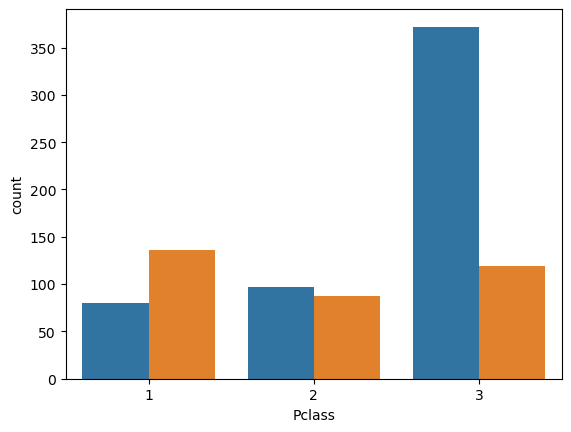

In [44]:
#seaborn 에서는 countplot
sns.countplot(data= data , x= "Pclass", hue = "Survived")

AttributeError: 'numpy.int64' object has no attribute 'startswith'

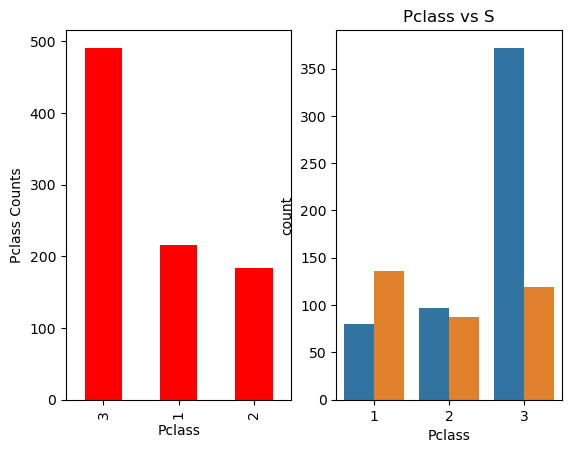

In [58]:
# Q) 위의 2가지의 그래프를 1개의 판에 합쳐서 그려보자!!!!
# 목적: 1판에 2개의 그래프를 같이 그리자!!!!
# --> 왼쪽 : 객실별 승객수(pandas)
# --> 오른쪽 : seaborn 생존여부에 객실등급
# ==> 서로 다른 종류 그래프들을 1개로 세팅!!! matplotlib

# 1) 전체 판에 대한 세팅
fig, axes = plt.subplots( nrows=1, ncols=2)
axes[0].set_ylabel("Pclass Counts")
axes[1].set_title("Pclass vs S")


# 2) 왼쪽 그래프에 대한 내용
data["Pclass"].value_counts().plot(kind="bar", ax = axes[0], color="r")

# 3) 오른쪽 그래프에 대한 내용
sns.countplot(data= data , x= "Pclass", hue = "Survived", ax=axes[1])
